In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import glob

In [2]:
def plot_loss(filename, ylim=None, start=0):
    data = pd.read_csv(filename, header=None)
    plt.plot(data[start:])
    if ylim is not None:
        plt.ylim(ylim)
    plt.yscale("log")
    plt.show()
    
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
    
def plot_diff_loss(filename, ylim=(0,0.02), start=0, window_length=1000):
    data = pd.read_csv(filename, header=None).values.reshape(-1)
    data = running_mean(data, window_length)
    diffs = data[start:-1000] - data[(start+1000):]
    plt.plot(diffs)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

In [5]:
# for f in sorted(glob.glob("../losses/*")):
#     print(f)
#     plot_diff_loss(f, start=0)

../losses/losses_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.00447_.txt


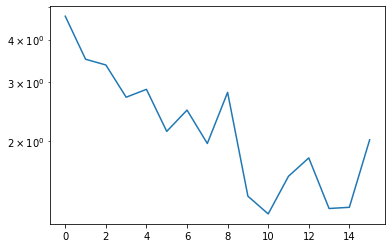

../losses/losses_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.00585_.txt


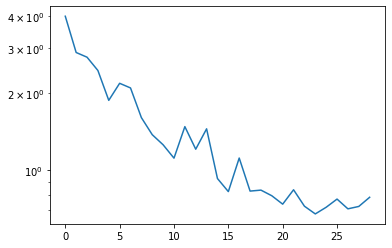

../losses/losses_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.00765_.txt


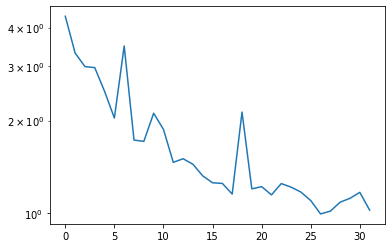

../losses/losses_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.01_.txt


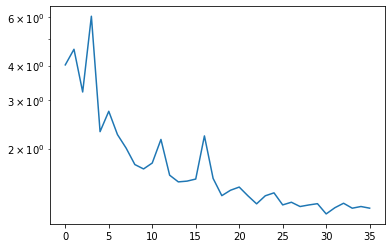

In [6]:
for f in sorted(glob.glob("../losses/*")):
    print(f)
    plot_loss(f, start=0)

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.00447_000014.png


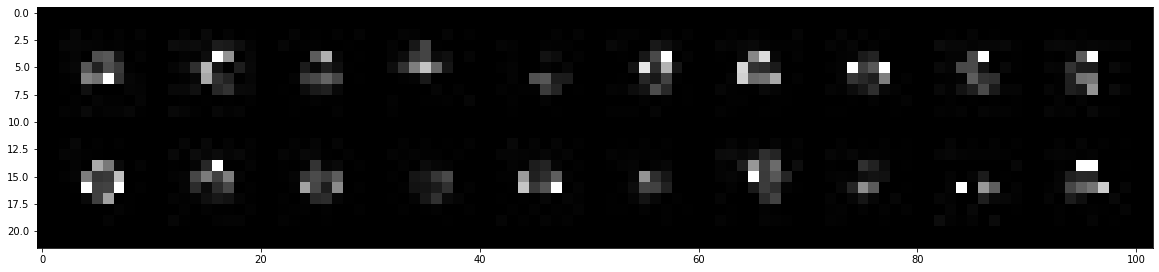

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.00585_000014.png


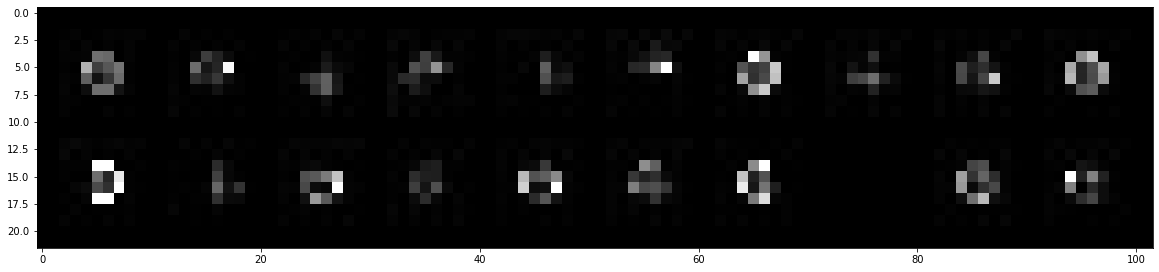

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.00765_000014.png


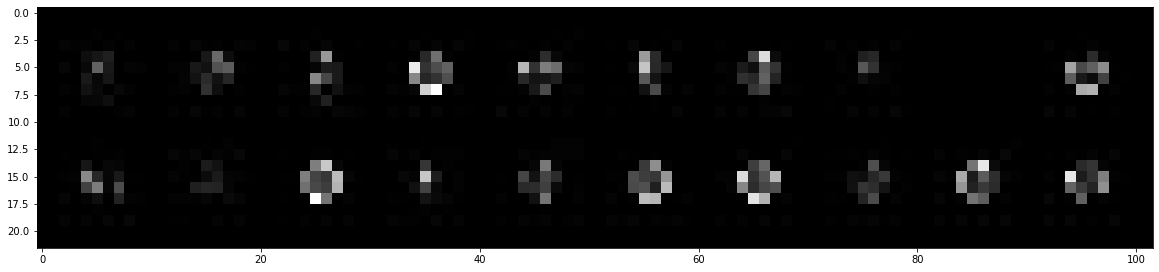

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#3;no_lu#False;affine#True;n_bits#5;lr#0.0001;img_size#8;temp#0.7;n_sample#20;dataset#point_2d;device#cuda:0;delta#0.01_000014.png


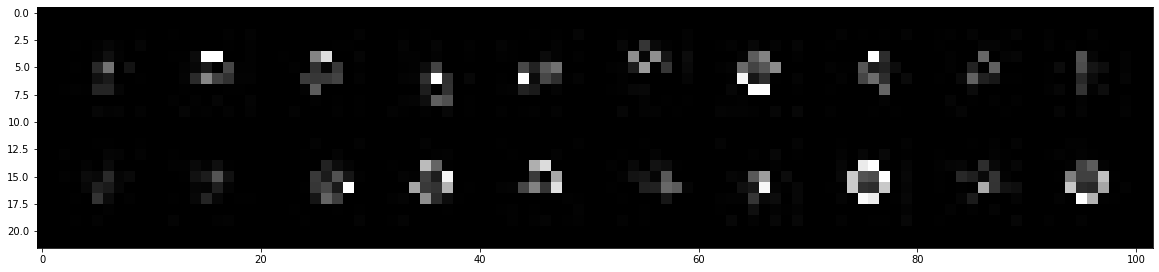

In [10]:
n = 10
for f in sorted(os.listdir("../sample")):
    if '000014' in f:
        print(f)
        img = Image.open(f"../sample/{f}")
        plt.figure(figsize = (n*2, n*10))
        plt.imshow(img)
        plt.show()
        

In [9]:
from torchvision.datasets import FashionMNIST, MNIST

In [10]:
data = FashionMNIST("~/datasets/fashion_mnist/")

/home/model/.virtualenvs/glow-pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


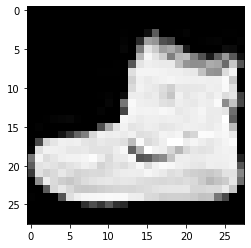

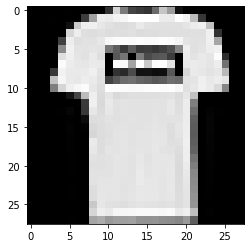

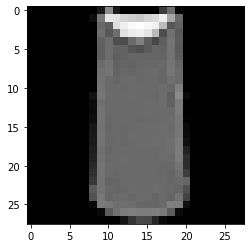

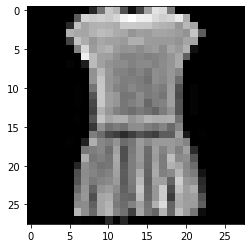

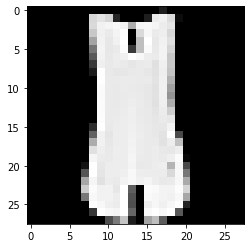

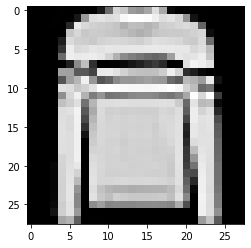

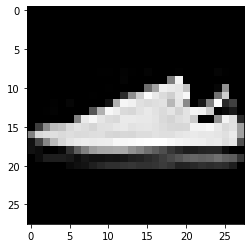

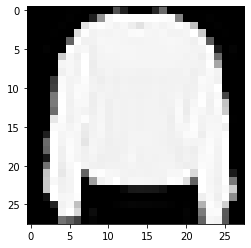

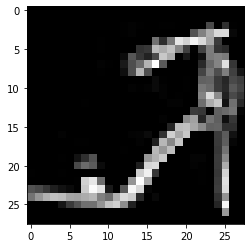

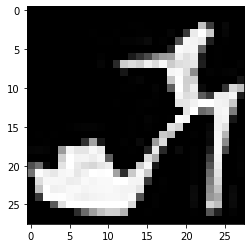

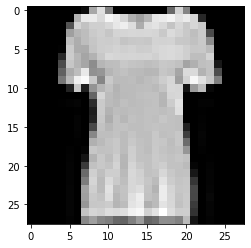

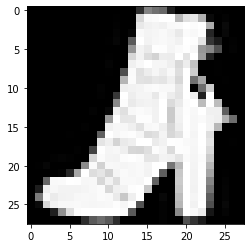

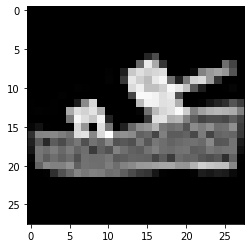

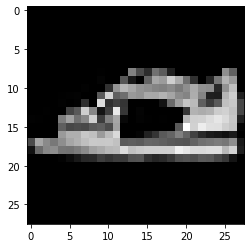

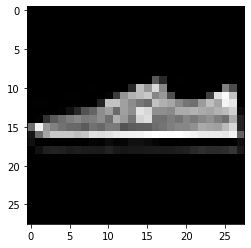

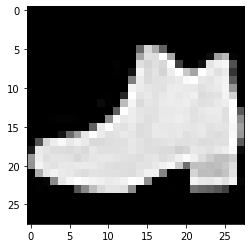

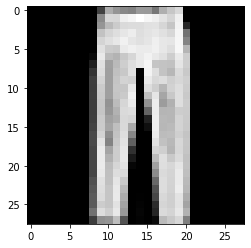

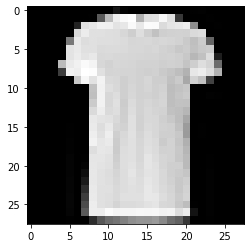

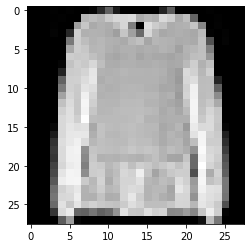

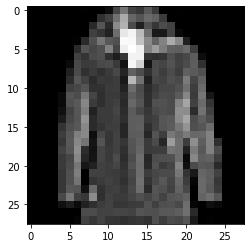

In [11]:
for i in range(20):
    plt.imshow(255-data.train_data[i].numpy(), cmap='Greys')
    plt.show()

In [58]:
# data = MNIST("/home/model/datasets/mnist/")
data = FashionMNIST("/home/model/datasets/fashion_mnist/")
X = data.train_data.numpy().reshape(60000, -1)/255
from sklearn.neighbors import NearestNeighbors

search = NearestNeighbors(n_neighbors=1)
search.fit(X)

/home/model/.virtualenvs/glow-pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


NearestNeighbors(n_neighbors=1)

In [59]:
neighbors = search.kneighbors(X[:1000], n_neighbors=2)

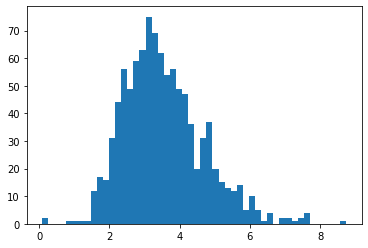

In [60]:
plt.hist(neighbors[0][:, 1], bins=50);

In [61]:
i1 = neighbors[0][:, 1].argmin()

In [68]:
i2 = neighbors[1][i1, 1]

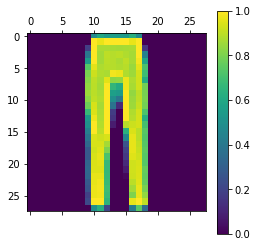

In [69]:
plt.matshow(X[i1].reshape(28,28))
plt.colorbar()

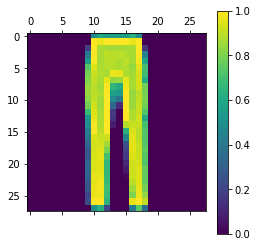

In [70]:
plt.matshow(X[i2].reshape(28,28))
plt.colorbar()

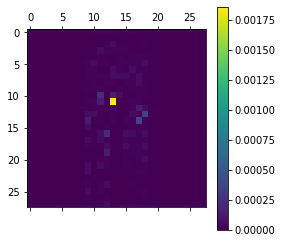

In [71]:
plt.matshow(((X[i2] - X[i1])**2).reshape(28,28))
plt.colorbar()

In [73]:
np.sqrt(((X[i2] - X[i1])**2).sum())

0.08636359037468719

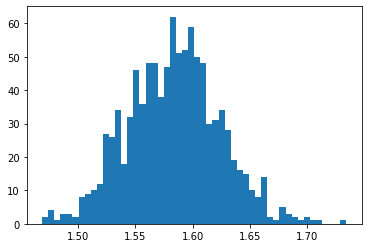

In [75]:
delta = 0.04
N = 1000
plt.hist(np.sqrt(((np.random.randn(N, 28*28)*delta - np.random.randn(N, 28*28)*delta)**2).sum(axis=1)), bins=50);

840